In [26]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [4]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


### 1 - Nam giới hay Nữ giới có tỷ lệ mua hàng cao hơn ?

In [18]:
df.groupby('Gender').count()['Invoice ID']

Gender
Female    501
Male      499
Name: Invoice ID, dtype: int64

### 2 - Hãy cho biết 3 loại sản phẩm bán chạy nhất là ? Tương tự, hãy cho biết 3 loại sản phẩm ít bán đc ra nhất

In [14]:
product_value = df.groupby('Product line').sum()['Quantity']

In [17]:
product_value.sort_values(ascending=False)

Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64

### 3 - Nam giới hay Nữ giới chi nhiều tiền hơn trong việc mua sắm

In [20]:
df.groupby('Gender').sum('Total')['Total']

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64

### 4 - Mặt hàng nào thu về lợi nhuận lớn nhất

In [22]:
product_total = df.groupby('Product line').sum('Total')['Total']

In [24]:
max_product_total = product_total.max()
for product,total in product_total.items():
    if total == max_product_total:
        print(product,total)

Food and beverages 56144.844


Text(0, 0.5, 'Total')

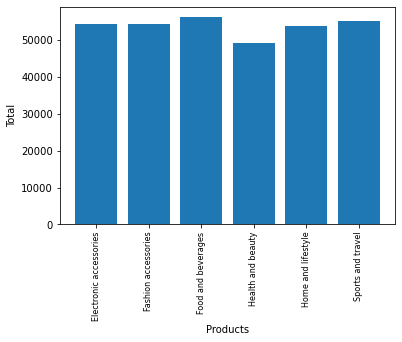

In [38]:
Products = set(df['Product line'])
plt.bar(x=sorted(Products), height=product_total)
plt.xticks(rotation=90, size=8)
plt.xlabel('Products')
plt.ylabel('Total')


###  5 - Loại khách hàng nào chi nhiều tiền hơn trong việc mua sắm, Khách thường hay Thành viên ?

In [39]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [40]:
df.groupby('Customer type').sum('Total')['Total']

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64